### Beginning Logging in filename='Forecasting_14Mar2024.log'

In [1]:
import logging

# Configure logging
logging.basicConfig(filename='Forecasting_14Mar2024.log', 
                    level=logging.DEBUG,     
                    format='%(asctime)s - %(levelname)s - %(message)s',  
                    datefmt='%Y-%m-%d %H:%M:%S')  

# Define custom error handler
def log_error(exc_msg):
    logging.error(exc_msg)

# Log notebook execution start
logging.info("Notebook execution started.")

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None) # to view all the column details without truncation

In [4]:
# SWM Project connection string for SQL Server
connection_string = 'DRIVER={SQL Server};SERVER=192.168.0.100;DATABASE=MFB_LIVE;UID=sa;PWD=scs@123'
connection = pyodbc.connect(connection_string)

# SWM SQL query to select all records from the required table
query = "SELECT * FROM DP_MFB_BASE WHERE R_NO = 1"

# Execute the query and store the result in a DataFrame
df = pd.read_sql(query, connection)
df # Top 5 and bottom 5 rows and columns details

,NUM_1,UNID,UNIT_STATUS,ACTION_CODE,LATITUDE,LONGITUDE,STATION,TYCOD,SUB_TYCOD,PRIM_UNIT,ALARM_LEV,CD_TS_CLEAN_DISP,CD_TS_CLEAN,DS_TS_CLEAN,EN_TS_CLEAN,AR_TS_CLEAN,RANGE,R_NO,VEHICLE_TYPE,RESP_TIME_IN_MINS,ACKNOWLEDGE_TIME_IN_MINS,LEAVE_TIME_IN_MINS,TRAVEL_TIME_IN_MINS,INCI_COMBINED,HOUR_INCI_BIN,MNTH,YR,MNTH_NAME,MNTH_YR,DAY_OF_WEEK,CLEAN_DATE
0,F202301231,MP61,Dispatch,29,19.247632,72.862479,DAHISAR,RESCUE_SERVICE,BIRD_RESCUE,MP61,1,2023-01-20 13:55:53,2023-01-20 13:56:05,2023-01-20 13:56:05,2023-01-20 13:58:02,2023-01-20 14:03:59,REGION-4,1,MP,8.10,0.20,1.95,5.95,F202301231MP61,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
1,F202301242,BK23,Dispatch,29,18.934805,72.834626,FORT,RESCUE_SERVICE,BIRD_RESCUE,BK23,1,2023-01-20 16:42:34,2023-01-20 16:42:49,2023-01-20 16:42:49,2023-01-20 16:50:01,2023-01-20 17:02:17,REGION-1,1,BK,19.72,0.25,7.20,12.27,F202301242BK23,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
2,F202301364,MP39,Dispatch,29,19.230020,72.840612,BORIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP39,1,2023-01-22 07:58:19,2023-01-22 08:05:11,2023-01-22 08:05:11,2023-01-22 08:05:46,2023-01-22 08:16:01,REGION-4,1,MP,17.70,6.87,0.58,10.25,F202301364MP39,MORNING,1,2023,January,Jan_2023,Sunday,2023-01-22
3,F202300310,BK11,Dispatch,29,19.261711,72.851505,KANDARPADA,FIRE_CALL,FIRE_CALL,BK11,1,2023-01-08 13:45:10,2023-01-08 13:45:26,NaT,NaT,NaT,REGION-4,1,BK,0.00,0.00,0.00,0.00,F202300310BK11,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
4,F202300321,MP36,Dispatch,29,19.197250,72.871520,DINDOSHI,RESCUE_SERVICE,BIRD_RESCUE,MP36,1,2023-01-08 16:40:36,2023-01-08 16:40:48,NaT,NaT,NaT,REGION-4,1,MP,0.00,0.00,0.00,0.00,F202300321MP36,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,F202312679,MP43,Dispatch,29,19.070771,72.868015,BKC,FIRE_CALL,FIRE_CALL,MP43,1,2023-09-08 16:56:47,2023-09-08 16:57:44,2023-09-08 16:57:44,2023-09-08 17:00:23,2023-09-08 17:36:08,REGION-3,1,MP,39.35,0.95,2.65,35.75,F202312679MP43,AFTERNOON,9,2023,September,Sep_2023,Friday,2023-09-08
15984,F202312726,MP34,Dispatch,29,18.961477,72.812637,GAWALATANK,RESCUE_SERVICE,ANIMAL_RESCUE,MP34,1,2023-09-10 09:42:16,2023-09-10 09:43:39,2023-09-10 09:43:39,2023-09-10 10:20:56,2023-09-10 10:21:02,REGION-1,1,MP,38.77,1.38,37.28,0.10,F202312726MP34,MORNING,9,2023,September,Sep_2023,Sunday,2023-09-10
15985,F202312887,MP38,Dispatch,29,19.201187,72.858109,KANDIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP38,1,2023-09-16 17:45:32,2023-09-16 18:35:48,2023-09-16 18:35:48,2023-09-16 18:36:28,2023-09-16 19:43:49,REGION-4,1,MP,118.28,50.27,0.67,67.35,F202312887MP38,EVENING,9,2023,September,Sep_2023,Saturday,2023-09-16
15986,F202312981,MP59,Dispatch,29,18.957974,72.832664,MEMONWADA,HOUSE_COLLAPSE,HOUSE_COLLAPSE,MP59,1,2023-09-19 12:44:34,2023-09-19 12:45:08,2023-09-19 12:45:08,2023-09-19 12:48:52,2023-09-19 13:01:37,REGION-1,1,MP,17.05,0.57,3.73,12.75,F202312981MP59,AFTERNOON,9,2023,September,Sep_2023,Tuesday,2023-09-19


Used SQL Server connection string to bring the needed table to Python and save it in a dataframe format.

### Column Description:

- NUM_1: Agency "event" number
- UNID: Shows the unit id details
- UNIT_STATUS: Gives the categorical status information about the unit on an incident
- ACTION_CODE: Numeric code details associated with the unit status category
- LATITUDE: Shows latitude co ordinates of the location
- LONGITUDE: Shows longitude co ordinates of the location
- STATION: Gives the station name information
- TYCOD: Provides the type code assigned to the incident/event
- SUB_TYCOD: Provides the sub type code assigned to the incident/event
- PRIM_UNIT: Primary Unit ID of unit that reported disposition code, requested case number via Assign Case Number, or arrived on the scene with the case number
- ALARM_LEV: This column shows the severity level code assigned to the incident
- CD_TS_CLEAN_DISP: Created Date Timestamp of AGENCY_EVENT table
- CD_TS_CLEAN: Created Date Timestamp of UN_HI (unit history) table
- DS_TS_CLEAN: Date Timestamp that the first unit was dispatched to the scene from UN_HI (unit history) table
- EN_TS_CLEAN: Date Timestamp when first unit was enroute to event from UN_HI (unit history) table
- AR_TS_CLEAN: Date Timestamp that the first unit arrived on the scene from UN_HI (unit history) table
- RANGE: Column shows the region wise information
- R_NO: Derived column created using ROW_NUMBER() OVER(PARTITION BY NUM_1 ORDER BY CD_TS_CLEAN ASC)
- VEHICLE_TYPE: Shows the vehicle type 2 letter codes
- RESP_TIME_IN_MINS: This column is derived by dividing TOT_RESP_TIME = (ACKNOWLEDGE_TIME +LEAVE_TIME + TRAVEL_TIME ) by 60 
- ACKNOWLEDGE_TIME_IN_MINS: This column is derived by dividing ACKNOWLEDGE_TIME [ABS(DATEDIFF(SECOND, CD_TS_CLEAN_DISP, DS_TS_CLEAN))] by 60
- LEAVE_TIME_IN_MINS: This column is derived by dividing LEAVE_TIME [ABS(DATEDIFF(SECOND, DS_TS_CLEAN, EN_TS_CLEAN))] by 60
- TRAVEL_TIME_IN_MINS: This column is derived by dividing TRAVEL_TIME [ABS(DATEDIFF(SECOND, EN_TS_CLEAN, AR_TS_CLEAN))] by 60
- INCI_COMBINED: NUM_1 + UNID columns are combined together to derive this column
- HOUR_INCI_BIN: Derived column that created bins using case in SQL where morning, afternoon, evening and night bins are created
- MNTH: Derived column showing the numeric value of month information
- YR: Derived column with year details
- MNTH_NAME: Derived column that shows only the entire month name information
- MNTH_YR: Derived column with Month name 3 letter code and Year details together
- DAY_OF_WEEK: Derived column that shows the day name of the week
- CLEAN_DATE: Derived column by casting date from "CD_TS_CLEAN" column which is again a derived column from "CDTS" a column present in "UN_HI" table

In [5]:
df.isna().sum()

NUM_1                          0
UNID                           0
UNIT_STATUS                    0
ACTION_CODE                    0
LATITUDE                       0
LONGITUDE                      0
STATION                        0
TYCOD                          0
SUB_TYCOD                      0
PRIM_UNIT                      0
ALARM_LEV                      0
CD_TS_CLEAN_DISP               0
CD_TS_CLEAN                    0
DS_TS_CLEAN                  731
EN_TS_CLEAN                 1994
AR_TS_CLEAN                 2574
RANGE                          0
R_NO                           0
VEHICLE_TYPE                   0
RESP_TIME_IN_MINS              0
ACKNOWLEDGE_TIME_IN_MINS       0
LEAVE_TIME_IN_MINS             0
TRAVEL_TIME_IN_MINS            0
INCI_COMBINED                  0
HOUR_INCI_BIN                  0
MNTH                           0
YR                             0
MNTH_NAME                      0
MNTH_YR                        0
DAY_OF_WEEK                    0
CLEAN_DATE

In [6]:
df.columns

Index(['NUM_1', 'UNID', 'UNIT_STATUS', 'ACTION_CODE', 'LATITUDE', 'LONGITUDE',
       'STATION', 'TYCOD', 'SUB_TYCOD', 'PRIM_UNIT', 'ALARM_LEV',
       'CD_TS_CLEAN_DISP', 'CD_TS_CLEAN', 'DS_TS_CLEAN', 'EN_TS_CLEAN',
       'AR_TS_CLEAN', 'RANGE', 'R_NO', 'VEHICLE_TYPE', 'RESP_TIME_IN_MINS',
       'ACKNOWLEDGE_TIME_IN_MINS', 'LEAVE_TIME_IN_MINS', 'TRAVEL_TIME_IN_MINS',
       'INCI_COMBINED', 'HOUR_INCI_BIN', 'MNTH', 'YR', 'MNTH_NAME', 'MNTH_YR',
       'DAY_OF_WEEK', 'CLEAN_DATE'],
      dtype='object')

**Checking through the columns and its data the below columns show potential for a Forecasting Model:**

RESP_TIME_IN_MINS: This column represents the response time in minutes, which could be a valuable target for forecasting. Can try to use this column first in predicting response times for future incidents based on historical data.

ALARM_LEV: Since "ALARM_LEV" represents the severity level of incidents, we could use it as a label for forecasting the severity of future incidents.

UNIT_STATUS: Depending on how the column is defined, this could be used to forecast the status of units involved in incidents. For example, we might want to predict whether units will be available, on standby, or engaged in response to future incidents.

ACTION_CODE: This column provides numeric code details associated with the unit status category. If it represents specific actions taken during incidents, we could use it to forecast the types of actions that will be required in the future.

VEHICLE_TYPE: If "VEHICLE_TYPE" represents the types of vehicles involved in incidents, we could use it to forecast the distribution of vehicle types for future incidents.

TYCOD and SUB_TYCOD: Depending on the granularity of these codes, this could be used to forecast the types and subtypes of incidents that will occur in the future.

DAY_OF_WEEK: To observe the forecasting patterns related to the day of the week, we could use this column as the label to predict incident counts or other metrics for each day.

HOUR_INCI_BIN: Similarly, if we want to forecast patterns related to the time of day, we could use this column to predict incident counts or other metrics for different time related bins.

In [7]:
df1 = df[['CLEAN_DATE', 'RESP_TIME_IN_MINS']].copy()
df1

,CLEAN_DATE,RESP_TIME_IN_MINS
0,2023-01-20,8.10
1,2023-01-20,19.72
2,2023-01-22,17.70
3,2023-01-08,0.00
4,2023-01-08,0.00
...,...,...
15983,2023-09-08,39.35
15984,2023-09-10,38.77
15985,2023-09-16,118.28
15986,2023-09-19,17.05


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# Ensuring that the CLEAN_DATE column is in datetime format
df1['CLEAN_DATE'] = pd.to_datetime(df1['CLEAN_DATE'])
df1

,CLEAN_DATE,RESP_TIME_IN_MINS
0,2023-01-20,8.10
1,2023-01-20,19.72
2,2023-01-22,17.70
3,2023-01-08,0.00
4,2023-01-08,0.00
...,...,...
15983,2023-09-08,39.35
15984,2023-09-10,38.77
15985,2023-09-16,118.28
15986,2023-09-19,17.05


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15988 entries, 0 to 15987
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CLEAN_DATE         15988 non-null  datetime64[ns]
 1   RESP_TIME_IN_MINS  15988 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 249.9 KB


In [11]:
# Sorting the DataFrame by CLEAN_DATE column
df1.sort_values(by='CLEAN_DATE', inplace=True)

In [12]:
# Feature engineering: Extract relevant features from clean_date

df1['Year'] = df1['CLEAN_DATE'].dt.year
df1['Month'] = df1['CLEAN_DATE'].dt.month
df1['Day'] = df1['CLEAN_DATE'].dt.day
df1['Day_of_week'] = df1['CLEAN_DATE'].dt.dayofweek

In [13]:
df1

,CLEAN_DATE,RESP_TIME_IN_MINS,Year,Month,Day,Day_of_week
5758,2022-11-30,35.38,2022,11,30,2
2406,2022-11-30,30.53,2022,11,30,2
2407,2022-11-30,2.42,2022,11,30,2
9921,2022-11-30,17.10,2022,11,30,2
5732,2022-11-30,4.47,2022,11,30,2
...,...,...,...,...,...,...
15458,2023-12-20,23.70,2023,12,20,2
13382,2023-12-21,64.23,2023,12,21,3
13554,2023-12-21,1.02,2023,12,21,3
9794,2023-12-21,15.27,2023,12,21,3


In [14]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
CLEAN_DATE,15988,2023-05-20 05:23:09.742306816,2022-11-30 00:00:00,2023-02-16 00:00:00,2023-05-10 00:00:00,2023-08-03 00:00:00,2023-12-21 00:00:00,NaN
RESP_TIME_IN_MINS,15988.0,24.157095,0.0,11.1,19.75,30.52,477.37,23.95315
Year,15988.0,2022.931198,2022.0,2023.0,2023.0,2023.0,2023.0,0.253124
Month,15988.0,5.942457,1.0,3.0,6.0,9.0,12.0,3.59645
Day,15988.0,15.778459,1.0,8.0,16.0,23.0,31.0,8.640652
Day_of_week,15988.0,3.005504,0.0,1.0,3.0,5.0,6.0,2.018547


Outliers:
      CLEAN_DATE  RESP_TIME_IN_MINS  Year  Month  Day  Day_of_week
3691  2022-11-30              64.45  2022     11   30            2
9933  2022-12-02              77.18  2022     12    2            4
4540  2022-12-03             240.82  2022     12    3            5
5759  2022-12-03              91.98  2022     12    3            5
2299  2022-12-05              71.72  2022     12    5            0
...          ...                ...   ...    ...  ...          ...
7899  2023-12-18              68.70  2023     12   18            0
15363 2023-12-18             124.05  2023     12   18            0
9793  2023-12-20              73.98  2023     12   20            2
15649 2023-12-20              82.07  2023     12   20            2
13382 2023-12-21              64.23  2023     12   21            3

[893 rows x 6 columns]


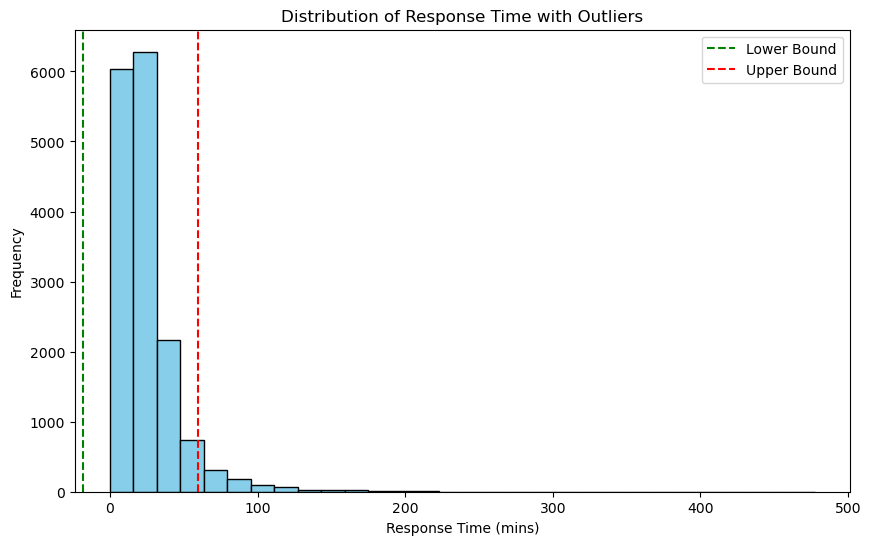

In [15]:
# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = df['RESP_TIME_IN_MINS'].quantile(0.25)
Q3 = df['RESP_TIME_IN_MINS'].quantile(0.75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df1[(df1['RESP_TIME_IN_MINS'] < lower_bound) | (df1['RESP_TIME_IN_MINS'] > upper_bound)]

# Printing the the outliers
print("Outliers:")
print(outliers)

# Visualizing the distribution of 'RESP_TIME_IN_MINS' with outliers
plt.figure(figsize=(10, 6))
plt.hist(df1['RESP_TIME_IN_MINS'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Response Time (mins)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Time with Outliers')
plt.axvline(x=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [16]:
# Dropping outliers from the DataFrame df1
df1 = df1[df1['RESP_TIME_IN_MINS'] <= upper_bound]

# Verify that outliers are dropped
print("DataFrame after dropping outliers:")
df1

DataFrame after dropping outliers:


,CLEAN_DATE,RESP_TIME_IN_MINS,Year,Month,Day,Day_of_week
5758,2022-11-30,35.38,2022,11,30,2
2406,2022-11-30,30.53,2022,11,30,2
2407,2022-11-30,2.42,2022,11,30,2
9921,2022-11-30,17.10,2022,11,30,2
5732,2022-11-30,4.47,2022,11,30,2
...,...,...,...,...,...,...
14277,2023-12-20,0.30,2023,12,20,2
15458,2023-12-20,23.70,2023,12,20,2
13554,2023-12-21,1.02,2023,12,21,3
9794,2023-12-21,15.27,2023,12,21,3


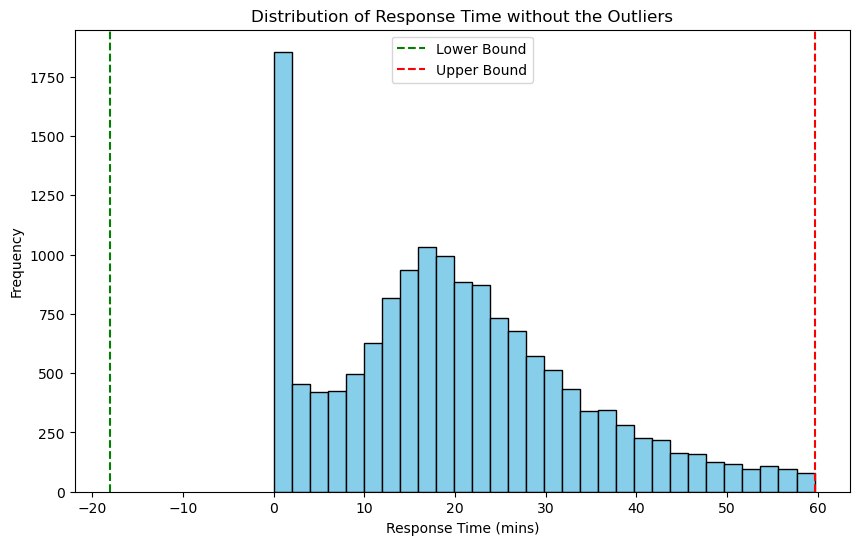

In [17]:
# Visualizing the distribution of 'RESP_TIME_IN_MINS' with outliers
plt.figure(figsize=(10, 6))
plt.hist(df1['RESP_TIME_IN_MINS'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Response Time (mins)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Time without the Outliers')
plt.axvline(x=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

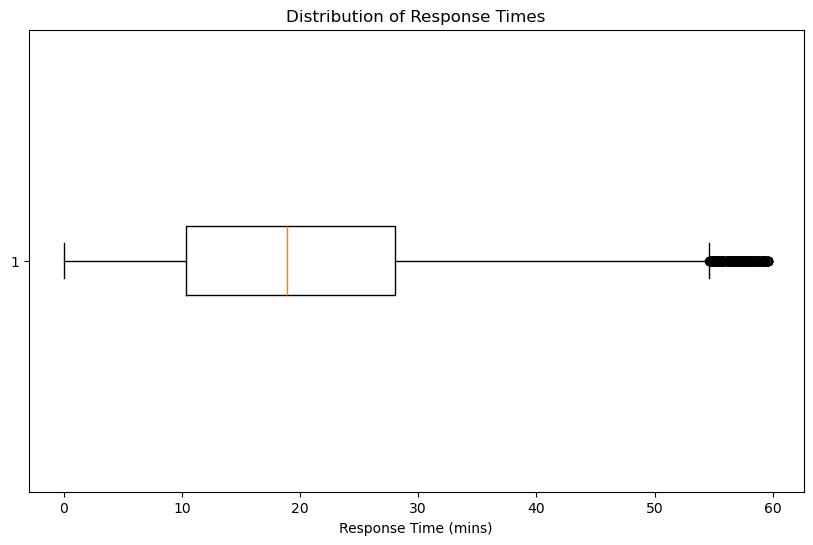

In [18]:
# Box plot of response times
plt.figure(figsize=(10, 6))
plt.boxplot(df1['RESP_TIME_IN_MINS'], vert=False)
plt.xlabel('Response Time (mins)')
plt.title('Distribution of Response Times')
plt.show() # can still see few fliers towards the upper bound

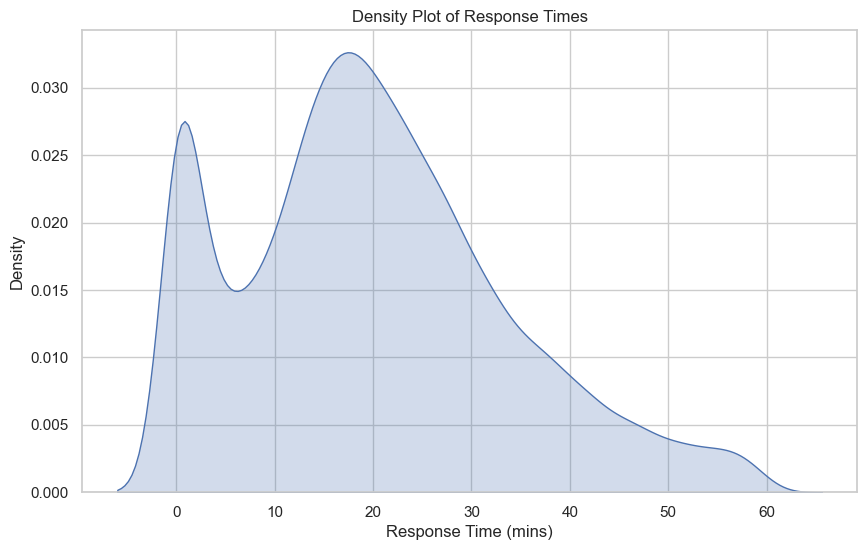

In [19]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df1['RESP_TIME_IN_MINS'], shade=True)
plt.xlabel('Response Time (mins)')
plt.ylabel('Density')
plt.title('Density Plot of Response Times')
plt.show() # observing the majority data distribution

In [20]:
df1.set_index('CLEAN_DATE', inplace=True) # setting the index using the CLEAN_DATE column

In [21]:
df1

,RESP_TIME_IN_MINS,Year,Month,Day,Day_of_week
CLEAN_DATE,,,,,
2022-11-30,35.38,2022,11,30,2
2022-11-30,30.53,2022,11,30,2
2022-11-30,2.42,2022,11,30,2
2022-11-30,17.10,2022,11,30,2
2022-11-30,4.47,2022,11,30,2
...,...,...,...,...,...
2023-12-20,0.30,2023,12,20,2
2023-12-20,23.70,2023,12,20,2
2023-12-21,1.02,2023,12,21,3


In [22]:
# Split the data into training and testing sets
train_size = int(len(df1) * 0.8)
train_data, test_data = df1.iloc[:train_size], df1.iloc[train_size:]

In [33]:
train_data

,RESP_TIME_IN_MINS,Year,Month,Day,Day_of_week
CLEAN_DATE,,,,,
2022-11-30,35.38,2022,11,30,2
2022-11-30,30.53,2022,11,30,2
2022-11-30,2.42,2022,11,30,2
2022-11-30,17.10,2022,11,30,2
2022-11-30,4.47,2022,11,30,2
...,...,...,...,...,...
2023-09-02,32.47,2023,9,2,5
2023-09-02,19.28,2023,9,2,5
2023-09-02,54.82,2023,9,2,5


In [34]:
test_data

,RESP_TIME_IN_MINS,Year,Month,Day,Day_of_week
CLEAN_DATE,,,,,
2023-09-02,58.52,2023,9,2,5
2023-09-02,21.83,2023,9,2,5
2023-09-02,8.33,2023,9,2,5
2023-09-02,19.82,2023,9,2,5
2023-09-02,18.62,2023,9,2,5
...,...,...,...,...,...
2023-12-20,0.30,2023,12,20,2
2023-12-20,23.70,2023,12,20,2
2023-12-21,1.02,2023,12,21,3


# ARIMA (Auto Regressive Integrated Moving Average)

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Choosing ARIMA time series forecasting model
model = ARIMA(train_data['RESP_TIME_IN_MINS'], order=(5,1,0))
fitted_model = model.fit()

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model.

In [24]:
# Making predictions using ARIMA model
start_index = len(train_data)
end_index = start_index + len(test_data) - 1
y_pred = fitted_model.predict(start=start_index, end=end_index, typ='levels')

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(test_data['RESP_TIME_IN_MINS'], y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 356.2460481592444


In [35]:
# RMSE
np.sqrt(mse)

18.874481401067538

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
# MAPE
mean_absolute_percentage_error(test_data['RESP_TIME_IN_MINS'], y_pred)

7012076585002718.0

In [40]:
print(test_data['RESP_TIME_IN_MINS'])

CLEAN_DATE
2023-09-02    58.52
2023-09-02    21.83
2023-09-02     8.33
2023-09-02    19.82
2023-09-02    18.62
              ...  
2023-12-20     0.30
2023-12-20    23.70
2023-12-21     1.02
2023-12-21    15.27
2023-12-21     0.57
Name: RESP_TIME_IN_MINS, Length: 3019, dtype: float64


In [41]:
np.average(test_data['RESP_TIME_IN_MINS'])

19.934670420669093

In [42]:
y_pred

12076    31.822649
12077    32.801710
12078    32.939941
12079    35.307944
12080    31.897940
           ...    
15090    33.102563
15091    33.102563
15092    33.102563
15093    33.102563
15094    33.102563
Name: predicted_mean, Length: 3019, dtype: float64

In [43]:
np.average(y_pred)

33.10230269020507

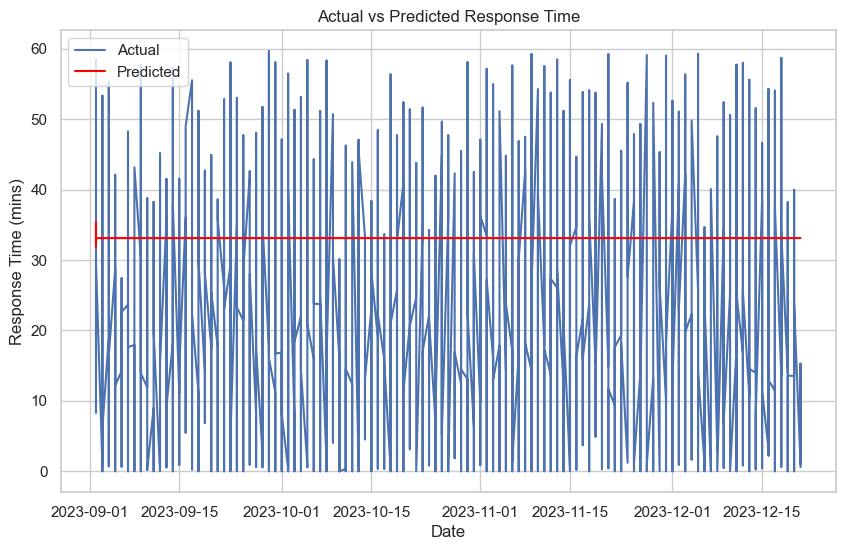

In [26]:
# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['RESP_TIME_IN_MINS'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Response Time (mins)')
plt.title('Actual vs Predicted Response Time')
plt.legend()
plt.show()

# SARIMA (Seasonal Auto Regressive Integrated Moving Average)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model_sarima = SARIMAX(df1['RESP_TIME_IN_MINS'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
result_sarima = model_sarima.fit()

# Make predictions
pred_sarima = result_sarima.predict(start=df1.index.min(), end=df1.index.max(), dynamic=False)

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['RESP_TIME_IN_MINS'], label='Actual')
plt.plot(df1.index, pred_sarima, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Response Time (mins)')
plt.title('Actual vs Predicted Response Time (SARIMA)')
plt.legend()
plt.show()

# Prophet

In [ ]:
pip install pystan
pip install fbprophet

In [ ]:
from fbprophet import Prophet

# Prepare data for Prophet
df_prophet = pd.DataFrame({'ds': df1.index, 'y': df1['RESP_TIME_IN_MINS']})

# Fit Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Make future predictions
future = model_prophet.make_future_dataframe(periods=365)
forecast_prophet = model_prophet.predict(future)

# Plot forecast
model_prophet.plot(forecast_prophet)
plt.xlabel('Date')
plt.ylabel('Response Time (mins)')
plt.title('Prophet Forecast')
plt.show()

# Exponential Smoothing (ETS)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
model_ets = ExponentialSmoothing(df1['RESP_TIME_IN_MINS'], seasonal='additive')
result_ets = model_ets.fit()

# Make predictions
pred_ets = result_ets.predict(start=df1.index.min(), end=df1.index.max())

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['RESP_TIME_IN_MINS'], label='Actual')
plt.plot(df1.index, pred_ets, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Response Time (mins)')
plt.title('Actual vs Predicted Response Time (ETS)')
plt.legend()
plt.show()

# LSTM (Long Short-Term Memory) Networks

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df1['RESP_TIME_IN_MINS'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # Example time step
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X, y, epochs=100, batch_size=32)

# Make predictions
pred_lstm = model_lstm.predict(X)

# Inverse transform the predictions
pred_lstm = scaler.inverse_transform(pred_lstm)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df1.index[time_step:], df1['RESP_TIME_IN_MINS'][time_step:], label='Actual')
plt.plot(df1.index[time_step:], pred_lstm, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Response Time (mins)')
plt.title('Actual vs Predicted Response Time (LSTM)')
plt.legend()
plt.show()

### Ending Logging in filename='Forecasting_14Mar2024.log'

In [27]:
try:
    # Log notebook execution end
    logging.info("Notebook execution completed.")
except Exception as e:
    # Log any errors that occur during notebook execution
    logging.error(f"An error occurred during notebook execution: {str(e)}")
finally:
    # Ensure the log file is closed
    logging.shutdown()